# EO-HARVEST
## Demonstration with Ifremer Opensearch Service for OSI SAF products

Ifremer Opensearch service (https://opensearch.ifremer.fr/) allows to search and select Satellite and In Situ data over space and time criteria. It offers in particular search capabilities for some OSI SAF products. No account is required.

In [1]:
# import eo-harvest package
import eo_harvest

# and other stuff
import datetime
import shapely.geometry


### Simple search
Searching granule files for a dataset using time and space criteria. Some of the currently accessible OSI SAF products include:

* L2P SST for Metop-A : `avhrr_sst_metop_a-osisaf-l2p-v1.0`
* L2P SST for Metop-B : `avhrr_sst_metop_b-osisaf-l2p-v1.0`
* L2P SST for Metop-C : `avhrr_sst_metop_c-osisaf-l2p-v1.0`


Let's search for instance L2P SST for Metop-B dataset, whose id is `avhrr_sst_metop_b-osisaf-l2p-v1.0`.



In [2]:
# define search area as shapely geometry (here a simple rectangular box: lon min, lat min, lon max, lat max)
area = shapely.geometry.box(-100, -20, -20, 20)

# define search time frame
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2020, 1, 2)

# performs the search
# first args is the data store, here `Ifremer`
res = eo_harvest.search_granule(
    'Ifremer',
    'avhrr_sst_metop_b-osisaf-l2p-v1.0',
    start,
    end,
    area,
)


## Inspecting the result

We get in ``res`` variable the list of granules, with their properties, that were returned by the query. A few operations can be done on these results.

### Display result footprints

It is possible to display the location of these found granules using ``plot`` function:

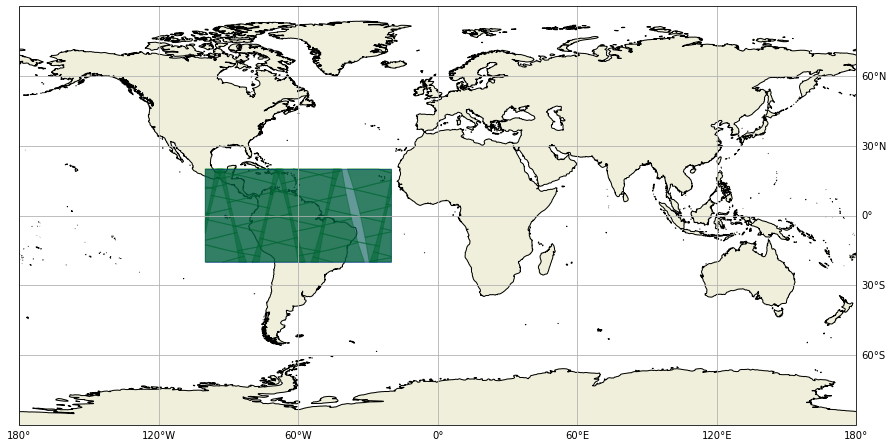

In [3]:
# display the location of found granules
eo_harvest.plot(res, clip=area)

### Description of the returned granules

The properties of the returned granules can be inspected, just printing the returned granule objects. Note that different protocols (and therefore URLs) are available to actually download granules.

In [4]:
# display the details of the first granule in the returned list
print(res.items[0])

20200101224903-OSISAF-L2P_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-sstmgr_metop01_20200101_224903-v02.0-fv01.0.nc
   start: 2020-01-01 22:49:03
   end: 2020-01-01 22:52:03
   footprint: POLYGON ((-20 4.031735826321738, -20 -6.992685187282905, -31.2978972285546 -9.424522265610641, -32.37257568769646 -4.236262144960055, -33.48255039066542 0.9940117559116032, -20 4.031735826321738))
   url: {'DATARMOR GPFS': '/home/ref-osisaf-public/data/sst/l2p/global/avhrr_metop_b/2020/001/20200101224903-OSISAF-L2P_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-sstmgr_metop01_20200101_224903-v02.0-fv01.0.nc', 'FTP': 'ftp://eftp1.ifremer.fr/cersat-rt/project/osi-saf/data/sst/l2p/global/avhrr_metop_b/2020/001/20200101224903-OSISAF-L2P_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-sstmgr_metop01_20200101_224903-v02.0-fv01.0.nc', 'HTTPS': 'https://osi-saf.ifremer.fr/sst/l2p/avhrr_metop_b/2020/001/20200101224903-OSISAF-L2P_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-sstmgr_metop01_20200101_224903-v02.0-fv01.0.nc'}




In [5]:
# print the name and URL (for FTP protocol) of all found granules
for c in res.items:
    print(c.name)
    print('URL: ', c.url['FTP'])
    print()

20200101224903-OSISAF-L2P_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-sstmgr_metop01_20200101_224903-v02.0-fv01.0.nc
URL:  ftp://eftp1.ifremer.fr/cersat-rt/project/osi-saf/data/sst/l2p/global/avhrr_metop_b/2020/001/20200101224903-OSISAF-L2P_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-sstmgr_metop01_20200101_224903-v02.0-fv01.0.nc

20200101040703-OSISAF-L2P_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-sstmgr_metop01_20200101_040703-v02.0-fv01.0.nc
URL:  ftp://eftp1.ifremer.fr/cersat-rt/project/osi-saf/data/sst/l2p/global/avhrr_metop_b/2020/001/20200101040703-OSISAF-L2P_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-sstmgr_metop01_20200101_040703-v02.0-fv01.0.nc

20200101101603-OSISAF-L2P_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-sstmgr_metop01_20200101_101603-v02.0-fv01.0.nc
URL:  ftp://eftp1.ifremer.fr/cersat-rt/project/osi-saf/data/sst/l2p/global/avhrr_metop_b/2020/001/20200101101603-OSISAF-L2P_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-sstmgr_metop01_20200101_101603-v02.0-fv01.0.nc

20200101101303-OSISAF-L2P_GHRSST-SSTsubskin-AVHRR

## Quicklook

Quicklooks are currently not available on Ifremer store.

## Download

Each returned granule (in ``res.items`` list) can be downloaded (``wget`` is used behind the scene), calling the ``download`` method on the granule to download. Main argument, ``mystore`` is the root folder where to save the downloaded granule: it will be saved in a subfolder ``<store>/<product identifier>/<year>/<day>/``. 

The access to OSI SAF products is password protected : you need to register on OSI SAF web site (http://www.osi-saf.org) to get your credentials. Then provide them to `download` method with `username` and `password` arguments.



In [6]:
res.items[2].download(mystore='.', username='*****', password='*****')

Failed (status=6) execution of: wget -c --auth-no-challenge --timeout 7200 --output-document Ifremer/avhrr_sst_metop_b-osisaf-l2p-v1.0/2020/001/20200101101603-OSISAF-L2P_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-sstmgr_metop01_20200101_101603-v02.0-fv01.0.nc --user ***** --password ***** ftp://eftp1.ifremer.fr/cersat-rt/project/osi-saf/data/sst/l2p/global/avhrr_metop_b/2020/001/20200101101603-OSISAF-L2P_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-sstmgr_metop01_20200101_101603-v02.0-fv01.0.nc


False

Of course you can download the data directly using the list of URLs as listed in previous step. This is safer and recommended for a large number of files, and you can use your favorite download tool.

## Advanced usage : multi-search
Let's search crossovers over a storm track for instance, e.g. a series of time and locations. We first build a list of search targets along a storm track, using some internal Ifremer libraries. It is eventuelly simply a list of tuples (date, shapely polygon).

The `multisearch` function in **eo-harvest** package allows to pass on the full list of time and locations, and harvest a consolidate result.

This step may takes a long time here, as we send a search request for each storm track time step (every hour), so more than 200 requests for the whole storm life time.

In [10]:
# first get a storm track from our storm track directory
import certoolbox.hurricanes

# identifier of the storm in ATCF convention
ATCF_NAME = 'wp202019'

# read the track
track = certoolbox.hurricanes.track(ATCF_NAME)

# transform into a list of time and search areas, using a colocation radius of 0.5 degrees (to ensure we are close to storm eye).
# The track is interpolated hourly for better precision and we will search within 30 minutes around each hourly track point.
targets = certoolbox.hurricanes.searchable_track(track, radius=3., interpolate='1H')


Run the multi-search (may take some time) and display result

In [15]:
res = eo_harvest.multisearch(
    'Ifremer',
    'avhrr_sst_metop_b-osisaf-l2p-v1.0',
    targets,
    delta_time=datetime.timedelta(minutes=30),
    prefetch_all=True
)

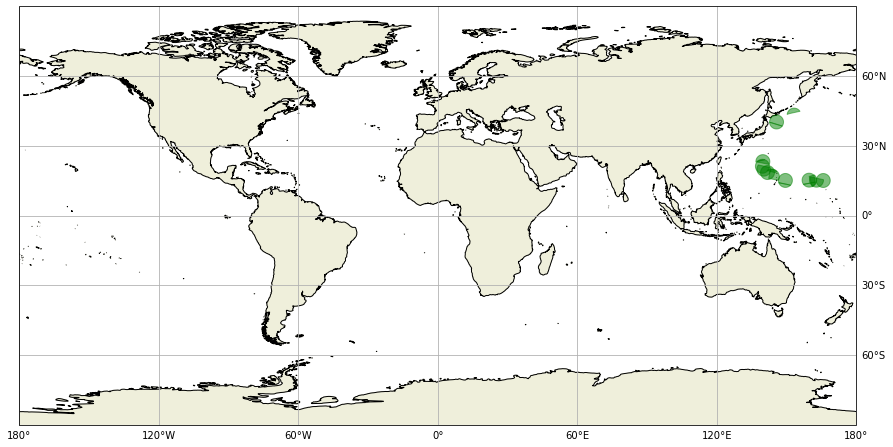

In [16]:
eo_harvest.plot(res)

In [17]:
# print the name and URL of found granules
for t, granules in res.items.items():
    if len(granules) > 0:
        for g in granules:
            print(g.name)

20191004100403-OSISAF-L2P_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-sstmgr_metop01_20191004_100403-v02.0-fv01.0.nc
20191004223703-OSISAF-L2P_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-sstmgr_metop01_20191004_223703-v02.0-fv01.0.nc
20191005094303-OSISAF-L2P_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-sstmgr_metop01_20191005_094303-v02.0-fv01.0.nc
20191005112203-OSISAF-L2P_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-sstmgr_metop01_20191005_112203-v02.0-fv01.0.nc
20191005112503-OSISAF-L2P_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-sstmgr_metop01_20191005_112503-v02.0-fv01.0.nc
20191006233403-OSISAF-L2P_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-sstmgr_metop01_20191006_233403-v02.0-fv01.0.nc
20191006233703-OSISAF-L2P_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-sstmgr_metop01_20191006_233703-v02.0-fv01.0.nc
20191007231303-OSISAF-L2P_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-sstmgr_metop01_20191007_231303-v02.0-fv01.0.nc
20191008005203-OSISAF-L2P_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-sstmgr_metop01_20191008_005203-v02.0-fv01.0.nc
20191008120403-OSIS